In [4]:
import numpy as np
import matplotlib.pyplot as plt

References http://benalexkeen.com/linear-programming-with-python-and-pulp-part-1/

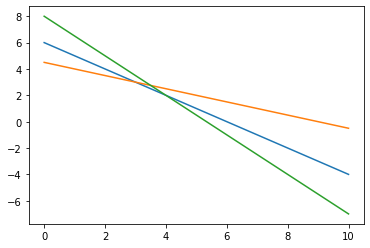

In [15]:
# Construct lines
# x > 0
x = np.linspace(0, 10, 100)
#y0= 0
y1= 6-x
y2= (9-x)/2.0
y3 = (16-3*x)/2.0

# Make plot
#plt.plot(x, y0)
plt.plot(x, y1, label=r'$y\geq2')
plt.plot(x, y2, label=r'$2y\leq25-x')
plt.plot(x, y3, label=r'$4y\geq 2x - 8')



No handles with labels found to put in legend.


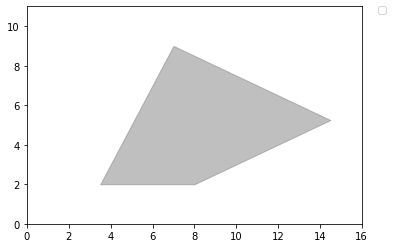

In [10]:
plt.xlim((0, 16))
plt.ylim((0, 11))
#plt.xlabel(r'$x)
#plt.ylabel(r'$y)
# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### How do you install glpk-solver along with pyomo in Winpython
Reference: https://stackoverflow.com/questions/20690195/how-do-you-install-glpk-solver-along-with-pyomo-in-winpython

If you are using Anaconda, both pyomo and glpk can be installed with conda install. In the Windows terminal, activate your conda environment, then:
conda install -c conda-forge glpk
glpsol --help

In [ ]:
conda install -c conda -forge glpk glpsol --help

In [1]:
import pyomo.environ as pyo

model = pyo.ConcreteModel()

model.x = pyo.Var([1,2], domain=pyo.NonNegativeReals)

model.OBJ = pyo.Objective(expr = 2*model.x[1] + 3*model.x[2])

model.Constraint1 = pyo.Constraint(expr = 3*model.x[1] + 4*model.x[2] >= 1)

opt = pyo.SolverFactory('glpk')
opt.solve(model) 

{'Problem': [{'Name': 'unknown', 'Lower bound': 0.666666666666667, 'Upper bound': 0.666666666666667, 'Number of objectives': 1, 'Number of constraints': 2, 'Number of variables': 3, 'Number of nonzeros': 3, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}}, 'Error rc': 0, 'Time': 0.03200387954711914}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

define variables

define optimization probelms

In [ ]:
solve optimization problem

In [17]:
my_lp_problem

My_LP_Problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: x + 2 y <= 25

_C2: - 2 x + 4 y >= -8

_C3: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

solve problems

In [18]:
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

'Optimal'

references: We have also checked the status of the solver, there are 5 status codes:

Not Solved: Status prior to solving the problem.
Optimal: An optimal solution has been found.
Infeasible: There are no feasible solutions (e.g. if you set the constraints x <= 1 and x >=2).
Unbounded: The constraints are not bounded, maximising the solution will tend towards infinity (e.g. if the only constraint was x >= 3).
Undefined: The optimal solution may exist but may not have been found.
We can now view our maximal variable values and the maximum value of Z.

We can use the varValue method to retrieve the values of our variables x and y, and the pulp.value function to view the maximum value of the objective function.

In [20]:
print (pulp.value(my_lp_problem.objective))

73.75


Reference: http://benalexkeen.com/linear-programming-with-python-and-pulp-part-4/